In [35]:
import numpy as np # linear algebra
import pandas as pd 

In [36]:
import os
import cv2
import pickle
import matplotlib.pyplot as plt
import random
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten, Conv2D, MaxPooling2D,BatchNormalization

In [37]:
print(tf.version)

<module 'tensorflow._api.v2.version' from 'c:\\Users\\Admin\\miniconda3\\envs\\tfg\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


In [38]:
real = "C:/Users/Admin/Desktop/hackathon/real_and_fake_face/training_real"
fake = "C:/Users/Admin/Desktop/hackathon/real_and_fake_face/training_fake"
#we're creating a list of real and fake images
real_path = os.listdir(real)
fake_path = os.listdir(fake)

In [39]:
print(len(real_path))
print(len(fake_path))

1081
960


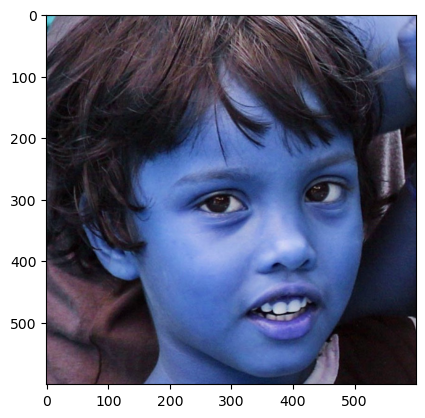

In [40]:
plt.imshow(cv2.imread(os.path.join(real, real_path[0])))

In [41]:
img_size = int(128)
def create_training_data():
    training_data = []
    y=[]
    for img in tqdm(real_path[:981]):
        path = os.path.join(real, img)
#         label = [1] 
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        training_data.append(np.array(image))
        y.append(1)
        
    for img in tqdm(fake_path[:860]):
        path = os.path.join(fake, img)
#         label = [0] 
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        training_data.append(np.array(image))  
        y.append(0)
        
    return(training_data,y)

In [42]:

def create_test_data():
    test_data = []
    output_data=[]
    for img in tqdm(real_path[981:]):
        path = os.path.join(real, img)
        image = cv2.resize( cv2.imread(path), (img_size,img_size) )
        
        test_data.append(np.array(image))
        output_data.append(1)
        
    for img in tqdm(fake_path[860:]):
        path = os.path.join(fake, img)
        image = cv2.resize(cv2.imread(path), (img_size,img_size))
        
        test_data.append(np.array(image))
        output_data.append(0)

    return(test_data,output_data)

In [43]:
X_train,Y_train = create_training_data()
X_test,Y_test= create_test_data()

100%|██████████| 100/100 [00:00<00:00, 152.44it/s]


In [44]:
l=list(zip(X_train,Y_train))
shuffle(l)
X_train,Y_train=zip(*l)

In [45]:
X_train = np.array(X_train)
X_train = X_train/255.0
Y_train=np.array(Y_train)
X_test = np.array(X_test)
X_test = X_test/255.0
Y_test=np.array(Y_test)

In [46]:
print(X_train.shape[1:])
print(X_train.shape[:])

(128, 128, 3)
(1841, 128, 128, 3)


In [47]:
df=pd.DataFrame(Y_train)
df[0].value_counts()

0
1    981
0    860
Name: count, dtype: int64

In [48]:
model = Sequential()
model.add(Conv2D(64,(3,3), input_shape=X_train.shape[1:])) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu")) 
model.add(Conv2D(32,(3,3)))  
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))
model.add(Conv2D(16,(3,3))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Activation("relu"))
model.add(Flatten()) 
model.add(Dense(128,kernel_regularizer="l2"))
model.add(Activation("relu",))
model.add(Dropout(0.12))
model.add(Dense(1)) 
model.add(Activation("sigmoid"))
opt = keras.optimizers.Adam(learning_rate=0.001)

In [49]:
model.compile(loss = "binary_crossentropy", optimizer =opt, metrics = ['accuracy'])

In [50]:
model.fit(X_train,Y_train, batch_size = 64, epochs = 15, validation_split = 0.2)

Epoch 1/15
Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000025FA93A9C60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000025FA93A9C60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_train_function.<locals>.train_function at 0x0000025FA93A9C60>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
22/23 [===========================>..] - ETA: 0s - loss: 2.0893 - accuracy: 0.5064WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000025FA93AB910> and will run it as-is.
Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x0000025FA93AB910>. Note that functions defined in certain environments, like the interactive Pyth

Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x0000025FA93AB910>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Model.make_test_function.<locals>.test_function at 0x0000025FA93AB910>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 2s 55ms/step - loss: 2.0527 - accuracy: 0.5088 - val_loss: 1.2043 - val_accuracy: 0.5339
Epoch 2/15
23/23 [==============================] - 1s 45ms/step - loss: 0.9355 - accuracy: 0.5448 - val_loss: 0.7775 - val_accuracy: 0.5637
Epoch 3/15
23/23 [==============================] - 1s 44ms/step - loss: 0.7392 - accuracy: 0.5516 - val_loss: 0.7171 - val_accuracy: 0.5312
Epoch 4/15
23/23 [==========

In [51]:
model.evaluate(X_test,Y_test)

7/7 [==============================] - 0s 7ms/step - loss: 0.7479 - accuracy: 0.6200


[0.7479203939437866, 0.6200000047683716]

In [52]:
model.save('my_finalised_cnn', save_format='tf')
trained_model = keras.models.load_model('my_finalised_cnn') 

Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000025FA93AA680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000025FA93AA680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function trace_model_call.<locals>._wrapped_model at 0x0000025FA93AA680>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x0000025E6B23A560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: coul

Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x0000025E6B23A560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function canonicalize_signatures.<locals>.signature_wrapper at 0x0000025E6B23A560>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: Unable to locate the source code of <function Layer._handle_weight_regularization.<locals>._loss_for_variable at 0x0000025FA93AA200>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_conver

Cause: Unable to locate the source code of <function Layer._handle_weight_regularization.<locals>._loss_for_variable at 0x0000025FA93AA200>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <function Layer._handle_weight_regularization.<locals>._loss_for_variable at 0x0000025FA93AA200>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


INFO:tensorflow:Assets written to: my_finalised_cnn\assets


INFO:tensorflow:Assets written to: my_finalised_cnn\assets
